In [359]:
import pandas as pd
import numpy as np

from scipy import spatial
from OSGridConverter import grid2latlong

In [360]:
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [361]:
def plate_carree_forward(lat, long):
    R = 6371  # Earths Radius in km
    return ()

In [362]:
# Load the data and sanity check
trigs_df = pd.read_csv('./trigs.csv')
trigs_df

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref
0,1,Ben Klibreck,TP9323,Pillar,Toppled,961.6,NC5852629917
1,2,Sgurr na Ciche,TP8527,Pillar,Remains,1040.3,NM9021796682
2,3,Coventry Airfield 2,TP8133,Pillar,Good,0.0,SP3538874990
3,4,Bembridge Fort,TP8116,Pillar,Toppled,0.0,SZ6238486123
4,5,Louven Howe Aux 2,TP7931,Pillar,Damaged,0.0,SE8539798753
...,...,...,...,...,...,...,...
6255,6256,Darlton,TP0006,Pillar,Good,47.6,SK7583272215
6256,6257,Moel Fammau,TP0005,Pillar,Good,554.3,SJ1616462653
6257,6258,Danby Beacon,TP0004,Pillar,Good,299.3,NZ7362609255
6258,6259,An Cuaidh,TP0002,Pillar,Good,296.6,NG7650089127


In [363]:
trigs_df[trigs_df.duplicated('Trigpoint Name', keep=False) == True].sort_values(by=['Trigpoint Name'])

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref
6011,6012,An Creachan,TP0837,Pillar,Slightly damaged,580.3,NS1096385831
6012,6013,An Creachan,TP0836,Pillar,Slightly damaged,356.9,NM8604321445
5973,5974,Ardmore,TP0876,Pillar,Good,0.0,NS3134778837
5974,5975,Ardmore,TP0875,Pillar,Good,46.0,NR4721750695
5841,5842,Bankhead,TP1011,Pillar,Good,251.2,NJ6554108173
...,...,...,...,...,...,...,...
216,217,Woodfield,TP7040,Pillar,Good,48.5,TL9400625250
214,215,Woodford,TP7042,Pillar,Toppled,156.3,SU1012735524
215,216,Woodford,TP7041,Pillar,Damaged,159.9,ST0682238736
155,156,Yr Allt,TP7107,Pillar,Slightly damaged,228.3,SJ2429410249


In [364]:
# Here is an example of converting the grid ref to lat/long
l_OSGB36 = grid2latlong('NC5852629917', tag='OSGB36')
(l_OSGB36.latitude, l_OSGB36.longitude)


(58.23553163127012, -4.411019371757128)

In [365]:
def try_grid2latlong(grid):
    try:
        l = grid2latlong(grid, tag='OSGB36')
        return np.array([l.latitude, l.longitude])
    except:
        return None

trigs_df['latlong'] = trigs_df.apply(lambda x: try_grid2latlong(x['Grid Ref']), axis=1)

In [366]:
# There are some trigs where the latlong conversion failed, so just remove them for now.
trigs_df[trigs_df['latlong'].isnull()]

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
109,110,Truskmore (OSI),TP7361,Pillar,Slightly damaged,0.0,MZ8638316308,None
123,124,Birreencorragh,TP7343,Pillar,Remains,0.0,RE0950480322,None
124,125,Hungry Hill (OSI),TP7341,Pillar,Good,0.0,RO6180027500,None


In [367]:
trigs_df = trigs_df.dropna()
trigs_df[trigs_df['latlong'].isnull()]

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong


In [368]:
trig_latlongs = np.stack(trigs_df['latlong'].to_numpy())
tri = spatial.Delaunay(trig_latlongs)

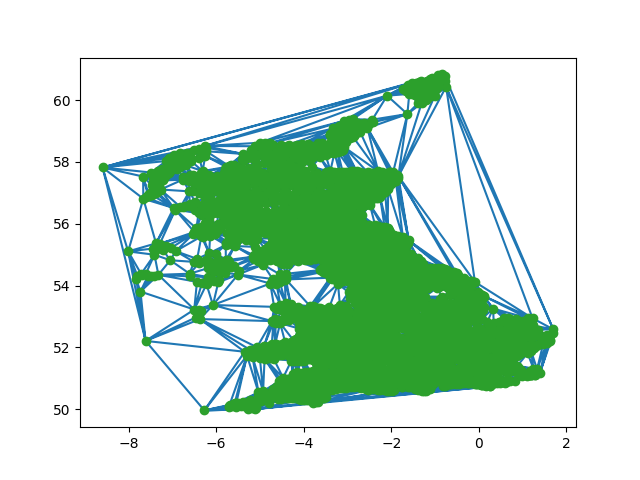

In [369]:
import matplotlib.pyplot as plt

%matplotlib widget

plt.triplot(trig_latlongs[:,1], trig_latlongs[:,0], tri.simplices)
plt.plot(trig_latlongs[:,1], trig_latlongs[:,0], 'o')
plt.show()

In [370]:
tri.simplices

array([[3175, 3590, 3033],
       [1265, 3863, 3033],
       [3033, 4029, 5095],
       ...,
       [3604, 3007,  302],
       [5173, 3007,  787],
       [3007, 3604,  787]], dtype=int32)

In [371]:
# Lets see a 'triangle' of trigs:
trigs_df.iloc[[3175, 3590, 3033]]

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
3178,3179,Hill Farm,TP3853,Pillar,Good,22.3,TM4274455020,"[52.13963356963, 1.5513743592768432]"
3593,3594,Goose Hill,TP3409,Pillar,Good,9.2,TM4712264628,"[52.223910966717085, 1.6224447274627054]"
3036,3037,Hope Farm,TP4009,Pillar,Good,76.2,TR3710646264,"[51.16587035304154, 1.3948948968977664]"


In [372]:
# Grab all the pairs of trigs from the triangle vertices
# So we have [a, b, c], pair [a, b], [b, c], [c, a]
trig_pairs = np.vstack([
    tri.simplices[:,0:2], 
    tri.simplices[:,1:3], 
    np.vstack([tri.simplices[:,0], tri.simplices[:,2]]).T
])

trig_pairs

array([[3175, 3590],
       [1265, 3863],
       [3033, 4029],
       ...,
       [3604,  302],
       [5173,  787],
       [3007,  787]], dtype=int32)

In [373]:
# Now calculate the euclidean distance based on the latlong of each trig
def trig_distance(indices):
    # Given the indices of two trigs in the trigs_df, calculate their euclidean distance
    a_coords, b_coords = trigs_df.iloc[indices[0]]['latlong'], trigs_df.iloc[indices[1]]['latlong']

    # return np.linalg.norm(b_coords - a_coords)
    return haversine(a_coords[0], a_coords[1], b_coords[0], b_coords[1])

distances = np.apply_along_axis(trig_distance, 1, trig_pairs)
distances[0]

10.54985366562378

In [374]:
trigs_df.iloc[[3175, 3590]]

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
3178,3179,Hill Farm,TP3853,Pillar,Good,22.3,TM4274455020,"[52.13963356963, 1.5513743592768432]"
3593,3594,Goose Hill,TP3409,Pillar,Good,9.2,TM4712264628,"[52.223910966717085, 1.6224447274627054]"


In [375]:
# It's a double trig!!
closest = trigs_df.iloc[trig_pairs[np.argmin(distances)]]
closest


,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
1,2,Sgurr na Ciche,TP8527,Pillar,Remains,1040.3,NM9021796682,"[57.013661591963114, -5.4592619721169084]"
1278,1279,Sgurr Na Ciche,TP5898,Pillar,Remains,1040.3,NM9021796683,"[57.013670559895495, -5.459262807744332]"


In [376]:
# And they're less than 1m apart.
distances[np.argmin(distances)]*1000

0.9984709351769638

In [378]:
# Get the indices of the 200 smallest distances
partition = np.argpartition(distances, 50)[0:50]

# Build a list of triples (name, name, distance) for each pair in the partition
close_trigs = []
for idx in partition:
    trig1_idx, trig2_idx = trig_pairs[idx][0], trig_pairs[idx][1]
    close_trigs.append((trigs_df.iloc[trig1_idx]['Trigpoint Name'], trigs_df.iloc[trig2_idx]['Trigpoint Name'], distances[idx]))

# Sort them by distance (partition doesn't do this for us)
close_trigs = sorted(close_trigs, key=lambda x: x[2])

# Print trigs only with differing names
for tup in close_trigs:
    if tup[0] == tup[1]:
        continue
    print(tup)

('Sgurr na Ciche', 'Sgurr Na Ciche', 0.0009984709351769639)
('Sgurr na Ciche', 'Sgurr Na Ciche', 0.0009984709351769639)
('Whitelyne Common [old]', 'Whitelyne Common', 0.0014117087861672073)
('Whitelyne Common', 'Whitelyne Common [old]', 0.0014117087861672073)
('Greenham Common', 'Greenham', 0.011383319939323023)
('Greenham Common', 'Greenham', 0.011383319939323023)
('Brick Bar', 'Nether Hall', 0.08414886202056317)
('Nether Hall', 'Brick Bar', 0.08414886202056317)
('Louven Howe Aux 1', 'Louven Howe', 0.08680733324424487)
('Louven Howe', 'Louven Howe Aux 1', 0.08680733324424487)
('Winkfield', 'Tory Hall Farm', 0.1510353964650581)
('Tory Hall Farm', 'Winkfield', 0.1510353964650581)
('Bustard', 'Bustard North-east', 0.21314747794319408)
('Bustard North-east', 'Bustard', 0.21314747794319408)
('Harrington South', 'Harrington North', 0.3606343763994681)
('Harrington North', 'Harrington South', 0.3606343763994681)
('North Luffenham South', 'North Luffenham North', 0.4110710784262265)
('North L

In [180]:
farthest = trigs_df.iloc[trig_pairs[np.argmax(distances)]]
farthest

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
2433,2434,Market Road Bradwell,TP4661,Pillar,Good,12.7,TG5044805278,"[52.58714284056824, 1.7017259861706227]"
4693,4694,Clibberswick,TP2221,Pillar,Good,160.3,HP6625812715,"[60.792567659359655, -0.7825506012864033]"


In [400]:
from math import inf
# Largest Altitude difference
def trig_height_diff(indices):
    # Given the indices of two trigs in the trigs_df, calculate their difference in height
    a_alt, b_alt = trigs_df.iloc[indices[0]]['Height (m)'], trigs_df.iloc[indices[1]]['Height (m)']

    # Discount this pair if one or more trigs has no height data
    if a_alt == 0 or b_alt == 0:
        return -inf

    return abs(a_alt - b_alt)

diffs = np.apply_along_axis(trig_height_diff, 1, trig_pairs)

In [401]:
# Most difference in altitude between trigs
most = trigs_df.iloc[trig_pairs[np.argmax(diffs)]]
most

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
5562,5563,Ben Nevis,TP1289,Pillar,Good,1346.9,NN1667571284,"[56.79705419299042, -5.004589719370657]"
4283,4284,Cruim Leacainn,TP2662,Pillar,Good,228.8,NN1645780527,"[56.87989775514604, -5.014838591880018]"


In [402]:
# 'Steepest' pair of trigs
gradients = diffs/distances
steepest = trigs_df.iloc[trig_pairs[np.argmax(gradients)]]
steepest

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
1279,1280,Sgurr Na Bana Mhoraire,TP5897,Pillar,Damaged,687.3,NG8701152655,"[57.51409518883549, -5.560400951124655]"
6047,6048,Aird Mhor,TP0798,Pillar,Good,54.3,NG8609355031,"[57.534966115797396, -5.577839346579113]"


In [403]:
gradients[gradients == -inf] = inf  # We have no height data for one or more in these pairs
shallowest = trigs_df.iloc[trig_pairs[np.argmin(gradients)]]
shallowest

,No.,Trigpoint Name,TP:UK Reference & Link,Trig Type,Condition,Height (m),Grid Ref,latlong
2720,2721,Langskaill,TP4354,Pillar,Good,35.1,HY4849045152,"[59.29013453168089, -2.904357911869186]"
1894,1895,Onziebist,TP5233,Pillar,Good,35.1,HY4701528783,"[59.142958898878966, -2.92626271031135]"
